In [56]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-09 17:33:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   110MB/s    in 1.0s    

2022-08-09 17:33:52 (110 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [57]:
!ls pizza_steak

test  train


In [58]:
!ls pizza_steak/train/

pizza  steak


In [59]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [60]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in {dirpath}")


There are 2 directories and 0 in pizza_steak
There are 2 directories and 0 in pizza_steak/test
There are 0 directories and 250 in pizza_steak/test/pizza
There are 0 directories and 250 in pizza_steak/test/steak
There are 2 directories and 0 in pizza_steak/train
There are 0 directories and 750 in pizza_steak/train/pizza
There are 0 directories and 750 in pizza_steak/train/steak


In [61]:
num_steak_iamges_train=len(os.listdir("pizza_steak/train/steak"))
num_steak_iamges_train

750

In [62]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape:{img.shape}")
  return img

Image shape:(512, 512, 3)


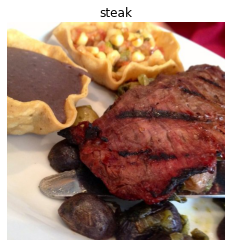

In [64]:
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="steak")

In [65]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [157,   6,  51],
        [151,   1,  46],
        [144,   0,  39]],

       [[255, 253, 254],
        [255, 253, 254],
        [255, 253, 254],
        ...,
        [157,   6,  51],
        [152,   3,  45],
        [145,   0,  40]],

       [[255, 254, 252],
        [255, 254, 252],
        [255, 254, 252],
        ...,
        [154,   4,  49],
        [149,   2,  44],
        [143,   0,  39]],

       ...,

       [[230, 230, 228],
        [230, 230, 228],
        [231, 231, 229],
        ...,
        [ 37,  15,  18],
        [ 38,  16,  18],
        [ 40,  18,  20]],

       [[231, 231, 229],
        [230, 230, 228],
        [230, 230, 228],
        ...,
        [ 41,  19,  22],
        [ 40,  18,  20],
        [ 40,  18,  20]],

       [[231, 231, 229],
        [230, 230, 228],
        [229, 229, 227],
        ...,
        [ 48,  26,  2

In [66]:
img.shape

(512, 512, 3)

In [67]:
img/255.


array([[[1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ],
        [1.        , 0.99215686, 1.        ],
        ...,
        [0.61568627, 0.02352941, 0.2       ],
        [0.59215686, 0.00392157, 0.18039216],
        [0.56470588, 0.        , 0.15294118]],

       [[1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        [1.        , 0.99215686, 0.99607843],
        ...,
        [0.61568627, 0.02352941, 0.2       ],
        [0.59607843, 0.01176471, 0.17647059],
        [0.56862745, 0.        , 0.15686275]],

       [[1.        , 0.99607843, 0.98823529],
        [1.        , 0.99607843, 0.98823529],
        [1.        , 0.99607843, 0.98823529],
        ...,
        [0.60392157, 0.01568627, 0.19215686],
        [0.58431373, 0.00784314, 0.17254902],
        [0.56078431, 0.        , 0.15294118]],

       ...,

       [[0.90196078, 0.90196078, 0.89411765],
        [0.90196078, 0.90196078, 0.89411765],
        [0.90588235, 0

In [68]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 362ms/step - loss: 0.5674 - accuracy: 0.6907 - val_loss: 0.3826 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4166 - accuracy: 0.8167 - val_loss: 0.3659 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3858 - accuracy: 0.8327 - val_loss: 0.3126 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3601 - accuracy: 0.8447 - val_loss: 0.3022 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3163 - accuracy: 0.8733 - val_loss: 0.2967 - val_accuracy: 0.8740


Image shape:(512, 288, 3)
Image shape:(512, 384, 3)


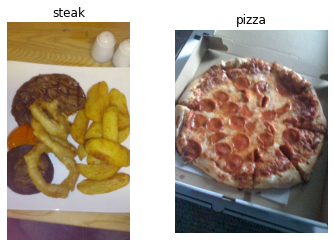

In [69]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

In [70]:
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [72]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [73]:
images,labels=train_data.next()
len(images),len(labels)

(32, 32)

In [74]:
len(train_data)

47

In [75]:
images[:2],images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [76]:
images[7]

array([[[0.73333335, 0.73333335, 0.7411765 ],
        [0.7372549 , 0.7372549 , 0.74509805],
        [0.7411765 , 0.7411765 , 0.7490196 ],
        ...,
        [0.01176471, 0.01960784, 0.00784314],
        [0.00784314, 0.01568628, 0.00392157],
        [0.00784314, 0.01568628, 0.00392157]],

       [[0.7411765 , 0.7411765 , 0.7490196 ],
        [0.74509805, 0.74509805, 0.75294125],
        [0.74509805, 0.74509805, 0.75294125],
        ...,
        [0.01176471, 0.01960784, 0.00784314],
        [0.00784314, 0.01568628, 0.00392157],
        [0.00784314, 0.01568628, 0.00392157]],

       [[0.7411765 , 0.7411765 , 0.7490196 ],
        [0.74509805, 0.74509805, 0.75294125],
        [0.7490196 , 0.7490196 , 0.7568628 ],
        ...,
        [0.01176471, 0.01960784, 0.00784314],
        [0.00784314, 0.01568628, 0.00392157],
        [0.00784314, 0.01568628, 0.00392157]],

       ...,

       [[0.77647066, 0.7568628 , 0.74509805],
        [0.7725491 , 0.75294125, 0.7411765 ],
        [0.77647066, 0

In [77]:
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

In [78]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [79]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [80]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [81]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 1.3377 - accuracy: 0.5827 - val_loss: 0.5335 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4825 - accuracy: 0.7913 - val_loss: 0.4652 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3789 - accuracy: 0.8407 - val_loss: 0.3450 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.2449 - accuracy: 0.9153 - val_loss: 0.3602 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.1099 - accuracy: 0.9733 - val_loss: 0.4681 - val_accuracy: 0.8320


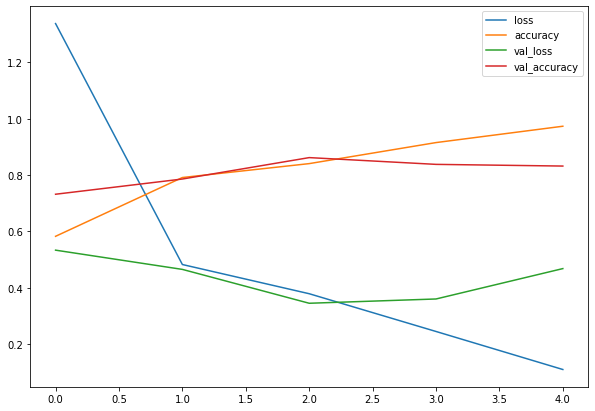

In [82]:
import pandas as pd
df=pd.DataFrame(history_4.history)
df.plot(figsize=(10,7))

In [83]:
df
import matplotlib.pyplot as plt

In [84]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))
  
#  plt.figure(figsize=(10,10))
#  plt.subplot(2,1,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

 # plt.subplot(2,1,2)
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend();


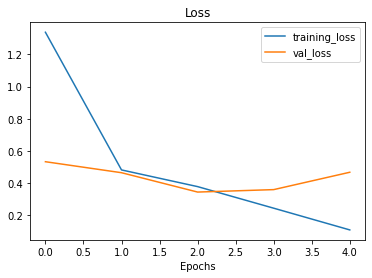

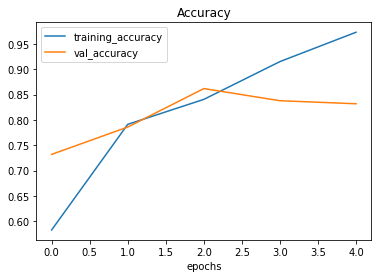

In [85]:
plot_loss_curves(history_4)

In [86]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_18 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [88]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6491 - accuracy: 0.6127 - val_loss: 0.5785 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4641 - accuracy: 0.7900 - val_loss: 0.3475 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4116 - accuracy: 0.8260 - val_loss: 0.3354 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3881 - accuracy: 0.8233 - val_loss: 0.3773 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3717 - accuracy: 0.8407 - val_loss: 0.3134 - val_accuracy: 0.8740


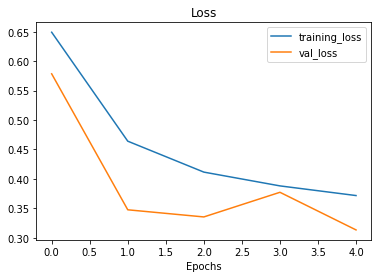

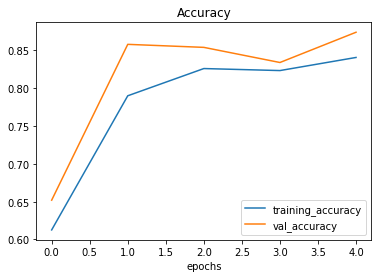

In [89]:
plot_loss_curves(history_5)

In [90]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 10)      

In [91]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [92]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


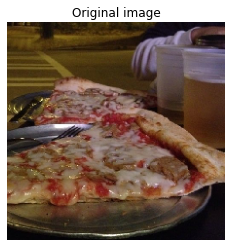

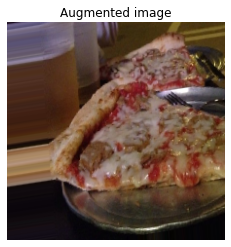

In [93]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [103]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 468ms/step - loss: 0.7192 - accuracy: 0.4540 - val_loss: 0.6856 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6822 - accuracy: 0.6367 - val_loss: 0.6613 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 23s 482ms/step - loss: 0.6855 - accuracy: 0.6480 - val_loss: 0.6087 - val_accuracy: 0.6060
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6967 - accuracy: 0.5780 - val_loss: 0.6437 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6622 - accuracy: 0.6213 - val_loss: 0.5823 - val_accuracy: 0.7360


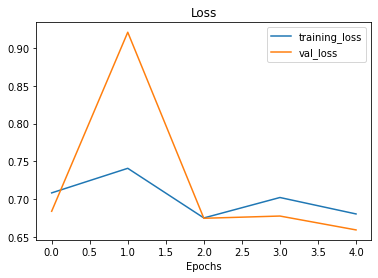

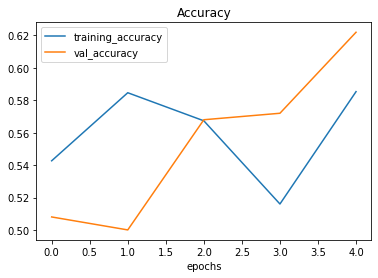

In [95]:
plot_loss_curves(history_6)

In [108]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 485ms/step - loss: 0.6925 - accuracy: 0.5280 - val_loss: 0.6195 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.5896 - accuracy: 0.6973 - val_loss: 0.5019 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5629 - accuracy: 0.7233 - val_loss: 0.4901 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 23s 492ms/step - loss: 0.5344 - accuracy: 0.7367 - val_loss: 0.3896 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5004 - accuracy: 0.7607 - val_loss: 0.3823 - val_accuracy: 0.8440


In [96]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

--2022-08-09 17:41:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-08-09 17:41:34 (30.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

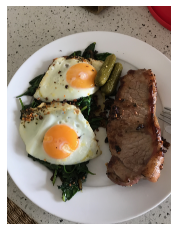

In [97]:
steak =mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [110]:
def load_and_prep_image(filename,img_shape=224):
  img=tf.io.read_file(filename)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img=img/255.
  return img

In [115]:

steak=load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [117]:
steak = tf.expand_dims(steak, axis=0)

In [120]:
pred = model_8.predict(steak)
pred


array([[0.85078716]], dtype=float32)

In [121]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [123]:
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [125]:
def pred_and_plot(model,filename,class_names=class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

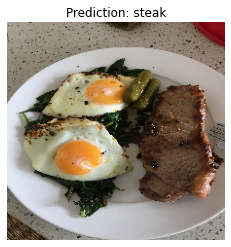

In [126]:
pred_and_plot(model_8,"03-steak.jpeg")

###Multiclass


In [129]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-08-09 18:21:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  69.9MB/s    in 8.2s    

2022-08-09 18:22:02 (60.4 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [130]:
import os
for dirpath,dirname,filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} direct and {len(filenames)} images in '{dirpath}'")

there are 0 direct and 0 images in '10_food_classes_all_data'
there are 0 direct and 0 images in '10_food_classes_all_data/test'
there are 0 direct and 250 images in '10_food_classes_all_data/test/sushi'
there are 0 direct and 250 images in '10_food_classes_all_data/test/chicken_wings'
there are 0 direct and 250 images in '10_food_classes_all_data/test/grilled_salmon'
there are 0 direct and 250 images in '10_food_classes_all_data/test/hamburger'
there are 0 direct and 250 images in '10_food_classes_all_data/test/fried_rice'
there are 0 direct and 250 images in '10_food_classes_all_data/test/pizza'
there are 0 direct and 250 images in '10_food_classes_all_data/test/chicken_curry'
there are 0 direct and 250 images in '10_food_classes_all_data/test/steak'
there are 0 direct and 250 images in '10_food_classes_all_data/test/ramen'
there are 0 direct and 250 images in '10_food_classes_all_data/test/ice_cream'
there are 0 direct and 0 images in '10_food_classes_all_data/train'
there are 0 dir

In [131]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [132]:
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape:(512, 512, 3)


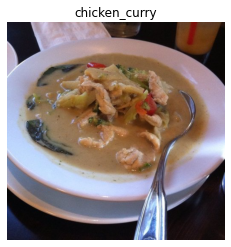

In [140]:
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))

In [143]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Activation

In [145]:
model_8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

In [146]:
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [147]:
history_8=model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.25*len(test_data)))



Epoch 1/5
235/235 [==============================] - 39s 162ms/step - loss: 2.1568 - accuracy: 0.2241 - val_loss: 2.0001 - val_accuracy: 0.2829
Epoch 2/5
235/235 [==============================] - 37s 157ms/step - loss: 1.9776 - accuracy: 0.2997 - val_loss: 1.9505 - val_accuracy: 0.2812
Epoch 3/5
235/235 [==============================] - 39s 166ms/step - loss: 1.8516 - accuracy: 0.3556 - val_loss: 1.8786 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 38s 161ms/step - loss: 1.5485 - accuracy: 0.4744 - val_loss: 1.8671 - val_accuracy: 0.3224
Epoch 5/5
235/235 [==============================] - 37s 158ms/step - loss: 0.9733 - accuracy: 0.6760 - val_loss: 2.2185 - val_accuracy: 0.2977


In [148]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 150ms/step - loss: 2.1737 - accuracy: 0.3236


[2.1737475395202637, 0.32359999418258667]

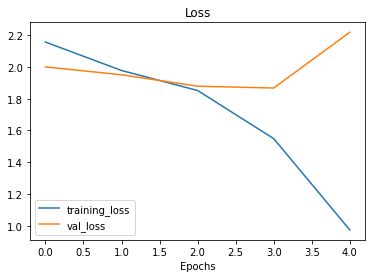

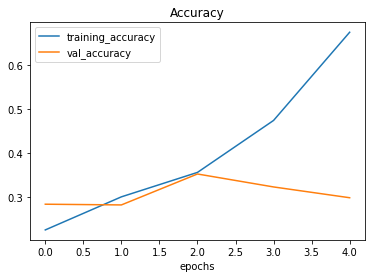

In [149]:
plot_loss_curves(history_8)

In [151]:
model_9=Sequential([
    Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
    #Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    #Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_9=model_9.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=int(0.25*len(test_data)))



Epoch 1/5
235/235 [==============================] - 38s 158ms/step - loss: 2.1493 - accuracy: 0.2391 - val_loss: 1.9294 - val_accuracy: 0.3059
Epoch 2/5
235/235 [==============================] - 36s 151ms/step - loss: 1.7539 - accuracy: 0.4081 - val_loss: 1.9309 - val_accuracy: 0.3059
Epoch 3/5
235/235 [==============================] - 36s 151ms/step - loss: 1.3763 - accuracy: 0.5491 - val_loss: 2.0959 - val_accuracy: 0.2878
Epoch 4/5
235/235 [==============================] - 36s 154ms/step - loss: 0.9325 - accuracy: 0.7089 - val_loss: 2.2641 - val_accuracy: 0.3026
Epoch 5/5
235/235 [==============================] - 37s 157ms/step - loss: 0.5519 - accuracy: 0.8400 - val_loss: 2.7488 - val_accuracy: 0.2664


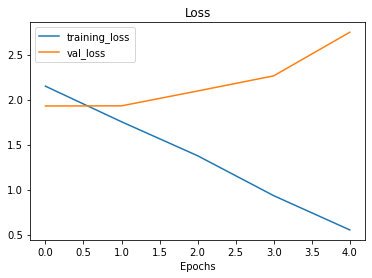

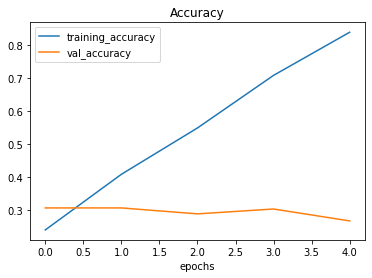

In [152]:
plot_loss_curves(history_9)

In [153]:
model_9.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 29160)             0         
                                                                 
 dense_17 (Dense)            (None, 10)              

In [154]:
model_8.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32)

Found 7500 images belonging to 10 classes.


In [162]:
model_10=tf.keras.models.clone_model(model_8)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 188ms/step - loss: 2.1540 - accuracy: 0.2299 - val_loss: 2.0018 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 43s 185ms/step - loss: 1.7361 - accuracy: 0.4061 - val_loss: 1.9884 - val_accuracy: 0.2988
Epoch 3/5
235/235 [==============================] - 43s 181ms/step - loss: 1.2802 - accuracy: 0.5841 - val_loss: 2.1833 - val_accuracy: 0.3044
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.7606 - accuracy: 0.7687 - val_loss: 2.5401 - val_accuracy: 0.2804
Epoch 5/5
235/235 [==============================] - 43s 181ms/step - loss: 0.3757 - accuracy: 0.9051 - val_loss: 2.9344 - val_accuracy: 0.2888


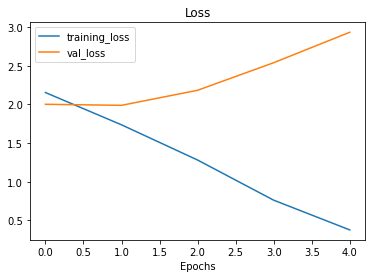

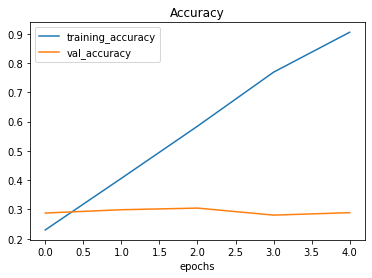

In [163]:
plot_loss_curves(history_10)